In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

### Importing Data

In [2]:
df = pd.read_csv('train.csv')


In [3]:
dftest = pd.read_csv('test.csv')

In [4]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [5]:
df.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [6]:
len(list(df.Customer_name.unique()))

5901

In [7]:
df.shape

(6368, 15)

In [8]:
df.drop('Customer_name',inplace=True,axis=1) #Customer_name is almost unique for every record so lets drop it

In [9]:
dftest.drop('Customer_name',inplace=True,axis=1)

In [10]:
#one hot encoding for ['Loyalty_customer']
df['Loyalty_customer'] = pd.get_dummies(df.Loyalty_customer,drop_first=True)

In [11]:
dftest['Loyalty_customer'] = pd.get_dummies(dftest.Loyalty_customer,drop_first=True)

In [12]:
df.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Loyalty_customer', 'Product_Category', 'Grade', 'Demand',
       'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price',
       'Maximum_price', 'Selling_Price'],
      dtype='object')

In [13]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,1,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,1,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,1,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,1,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,1,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [14]:
dftest.Product_Category.nunique()

10

In [15]:
# one hot encoding for ['Product_Category']
Product_Category = pd.get_dummies(df.Product_Category,drop_first=True)

In [16]:
# one hot encoding for ['Product_Category']
Product_Categorytest = pd.get_dummies(dftest.Product_Category,drop_first=True)

In [17]:
df = pd.concat([df,Product_Category],axis=1) #concatinating the one hot encoded feature



In [18]:
dftest = pd.concat([dftest,Product_Categorytest],axis=1)



In [19]:
dftest.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Loyalty_customer', 'Product_Category', 'Grade', 'Demand',
       'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price',
       'Maximum_price', 'Cosmetics', 'Educational', 'Fashion', 'Home_decor',
       'Hospitality', 'Organic', 'Pet_care', 'Repair', 'Technology'],
      dtype='object')

In [20]:
df.drop('Product_Category',inplace=True,axis=1)

In [21]:
dftest.drop('Product_Category',inplace=True,axis=1)

### Handling Outliers 

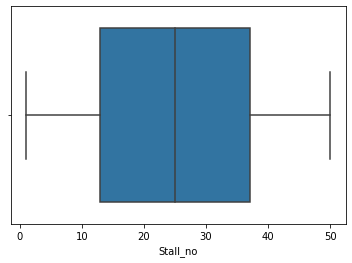

In [22]:
sns.boxplot(df.Stall_no)

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


25.0 25.30944523023731


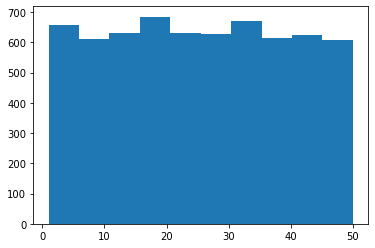

In [23]:
plt.hist(df.Stall_no)
print(df.Stall_no.median(),df.Stall_no.mean())

In [24]:
def detect_outliers(df,variable):
    first_quantile = df[variable].quantile(0.25)
    third_quantile = df[variable].quantile(0.75)
    iqr = third_quantile - first_quantile
    lower_bound = (first_quantile - 1.5*iqr)
    upper_bound = (third_quantile + 1.5*iqr)
    high_outliers = df[variable]>upper_bound
    low_outliers = df[variable] < lower_bound
    return df[(low_outliers)|(high_outliers)]

In [25]:
#random sample imputation to fill nan values in df.charges_1
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

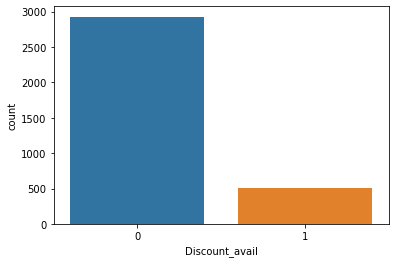

In [26]:
sns.countplot(dftest['Discount_avail'])

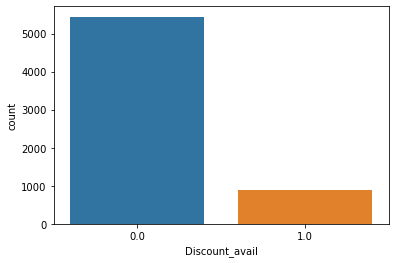

In [27]:
# dftest.Discount_avail.value_counts()
sns.countplot(df['Discount_avail'])

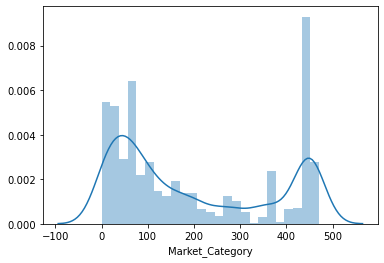

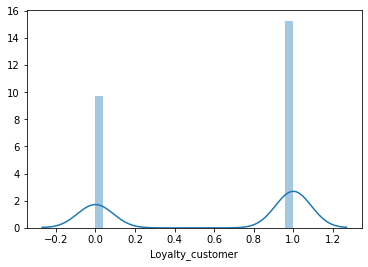

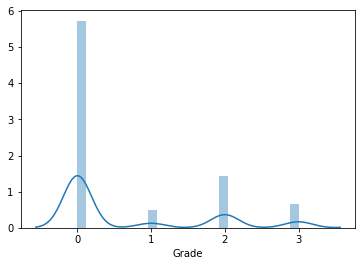

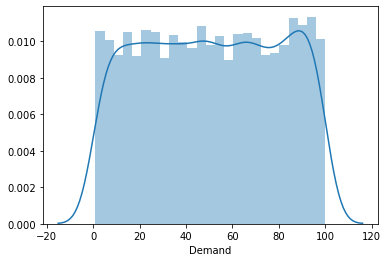

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


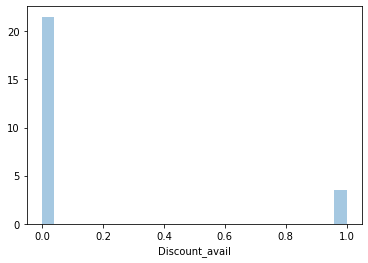

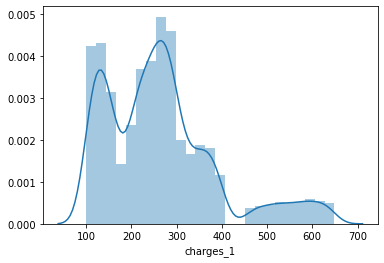

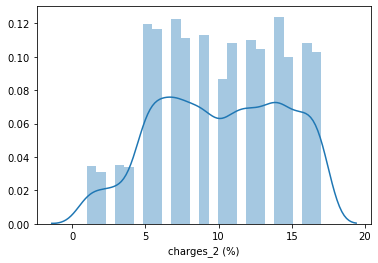

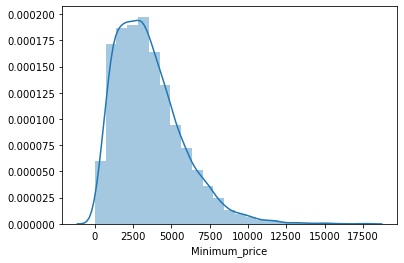

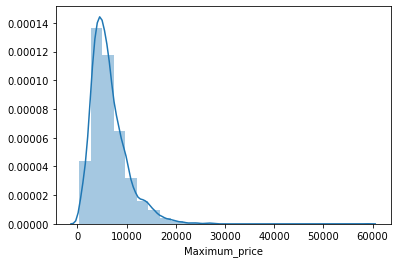

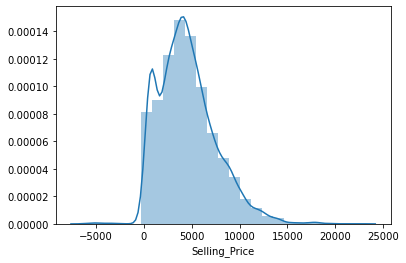

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


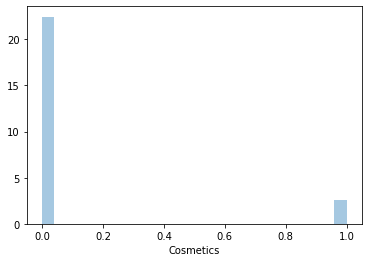

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


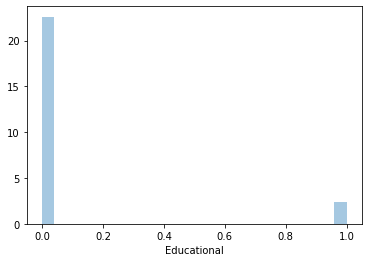

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


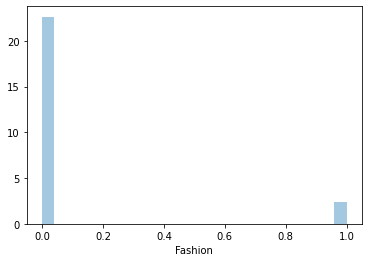

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


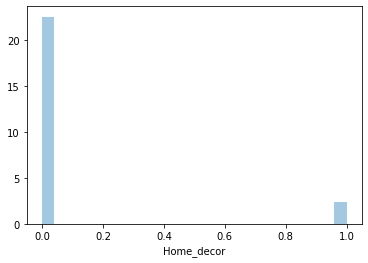

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


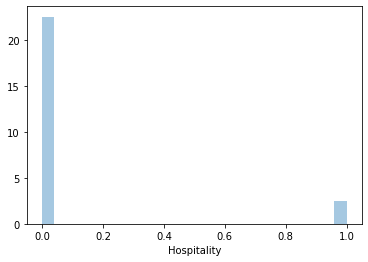

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


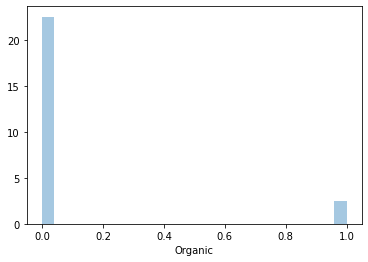

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


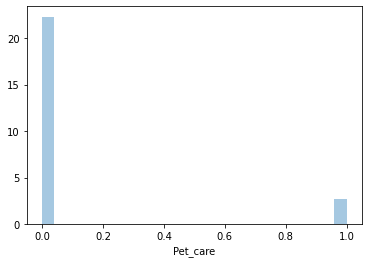

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


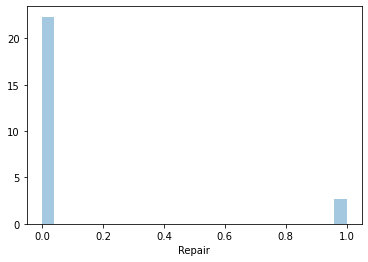

C:\Users\KRISHNA VAMSI NADH\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


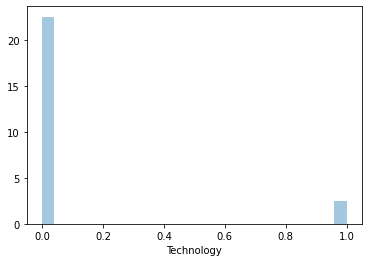

In [28]:
for col in df.columns[3:]:
    ax = sns.distplot(df[col], bins = 25)
    plt.show()

In [29]:
def out(data):
    first_quantile = data.quantile(0.25)
    third_quantile = data.quantile(0.75)
    iqr = third_quantile - first_quantile
    lower_bound = (first_quantile - 1.5*iqr)
    upper_bound = (third_quantile + 1.5*iqr)
    high_outliers = data>upper_bound
    low_outliers = data < lower_bound
    return low_outliers,high_outliers


In [30]:
def remove_outliers(df,variable):

    IQR = df[variable].quantile(0.75)-df[variable].quantile(0.25)
    upper_bridge = df[variable].quantile(0.75)+(IQR*1.5)
    low_bridge = df[variable].quantile(0.25)-(IQR*1.5)

    df.loc[df[variable]>=upper_bridge, variable]=upper_bridge
    df.loc[df[variable]<=low_bridge, variable]=abs(low_bridge)



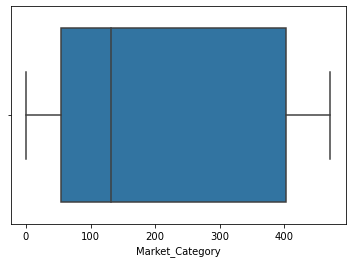

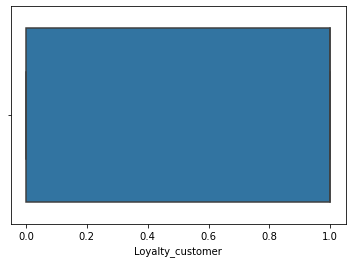

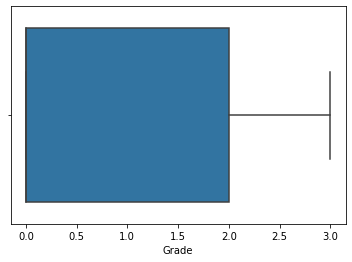

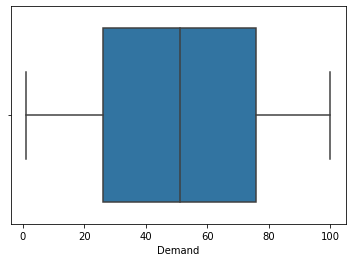

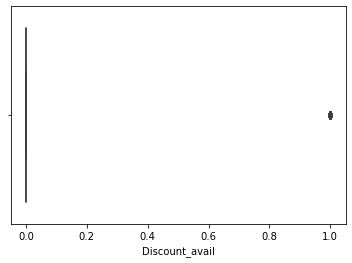

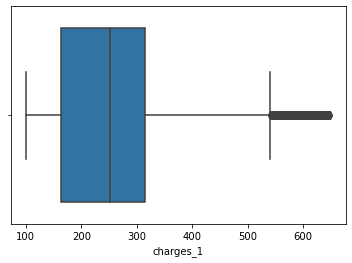

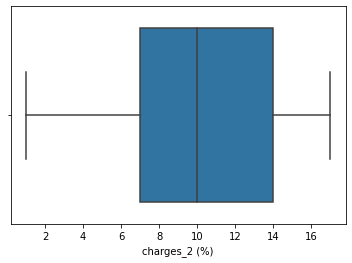

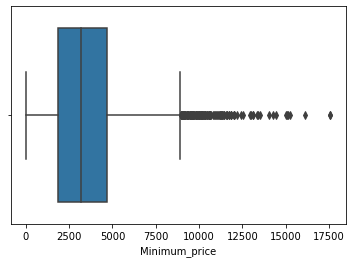

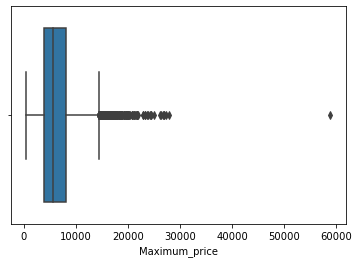

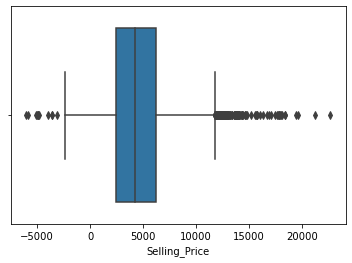

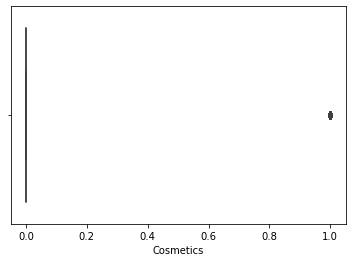

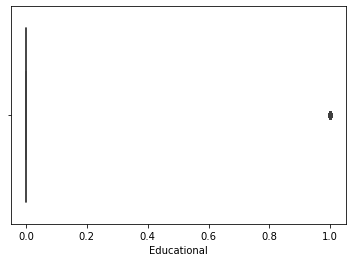

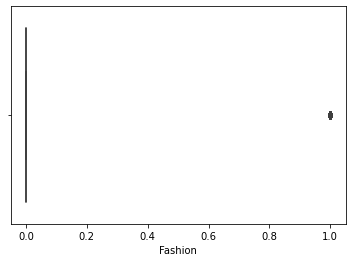

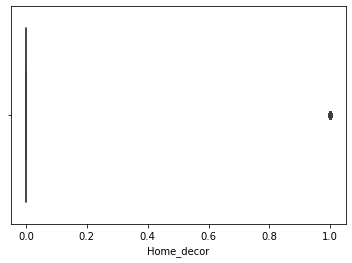

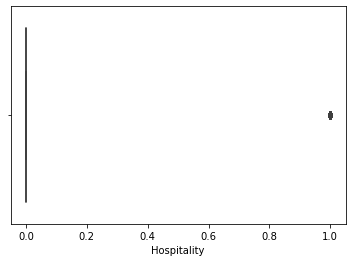

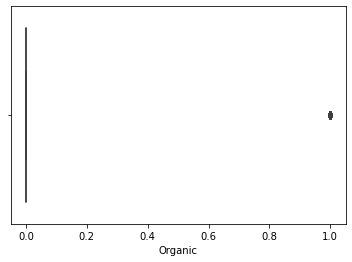

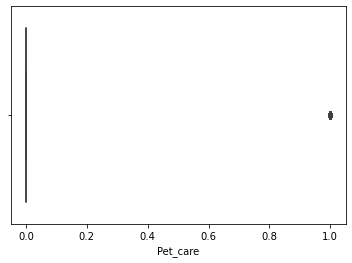

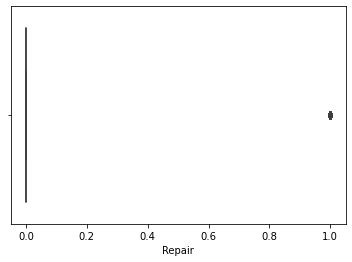

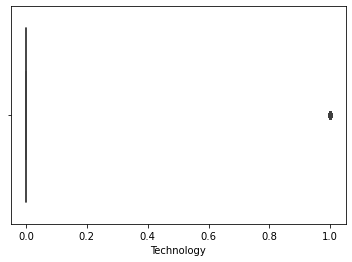

In [31]:
for col in df.columns[3:]:
    sns.boxplot(df[col])
    plt.show()

In [32]:
df.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Loyalty_customer', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)', 'Minimum_price', 'Maximum_price', 'Selling_Price',
       'Cosmetics', 'Educational', 'Fashion', 'Home_decor', 'Hospitality',
       'Organic', 'Pet_care', 'Repair', 'Technology'],
      dtype='object')

Features that have outliers are "charges_1","Minimum_price","Maximum_price","Selling_Price"

In [33]:
outliers = ["charges_1","Minimum_price","Maximum_price","Selling_Price"]

In [34]:
df.Selling_Price  = abs(df.Selling_Price)

In [35]:
#Handling Outliers
for feat in outliers:
    remove_outliers(df,feat)

In [36]:
#Handling Outliers
outliers.pop()
for feat in outliers:
    remove_outliers(dftest,feat)

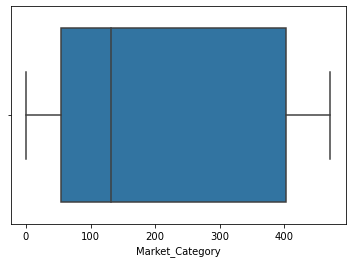

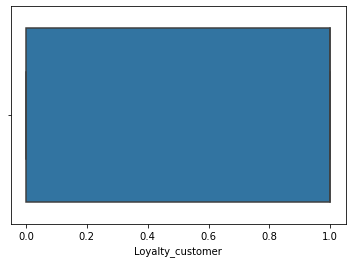

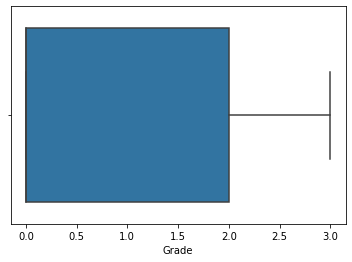

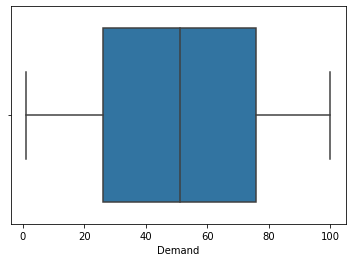

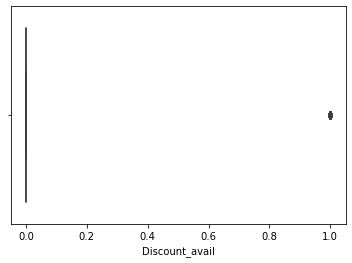

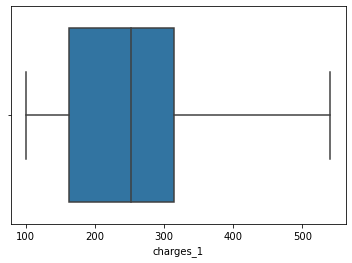

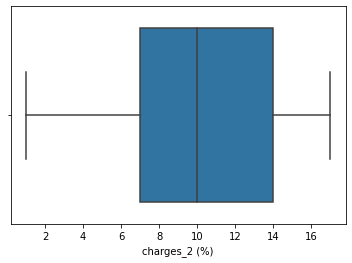

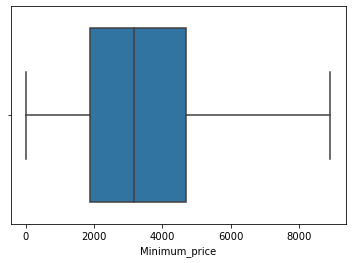

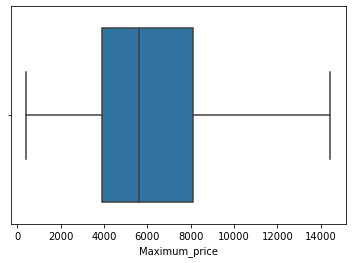

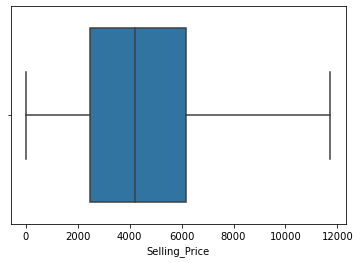

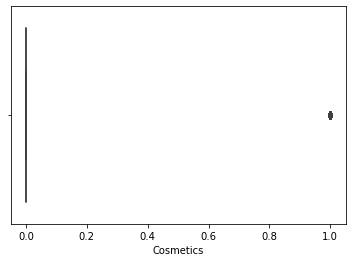

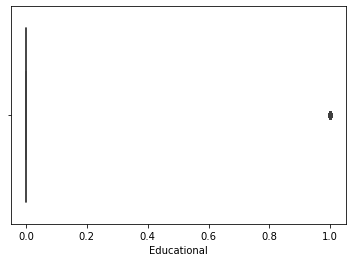

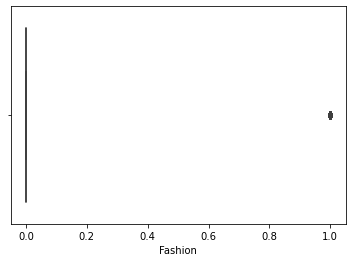

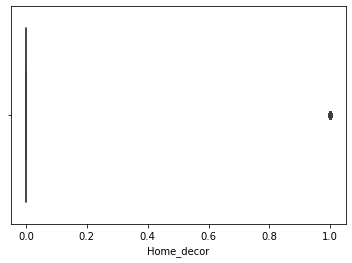

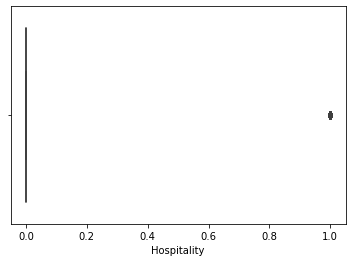

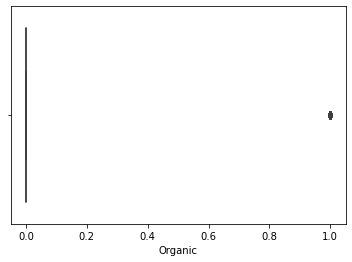

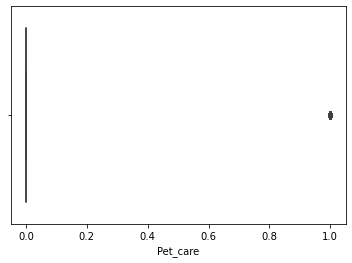

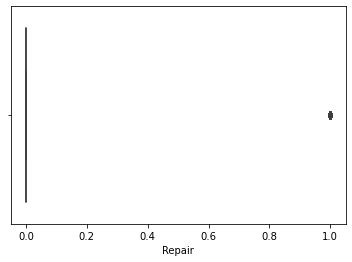

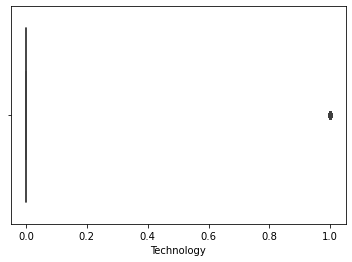

In [37]:
for col in df.columns[3:]:
    sns.boxplot(df[col])
    plt.show()

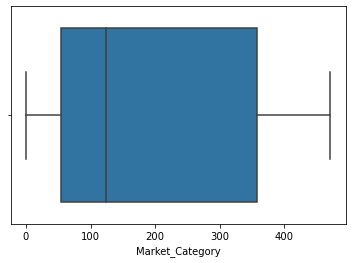

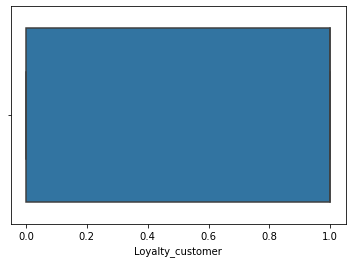

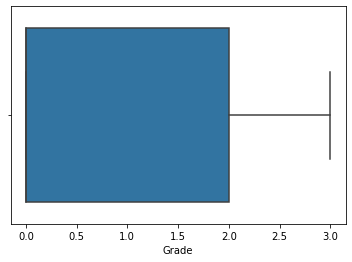

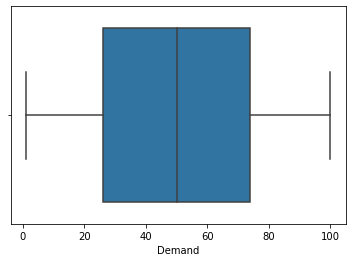

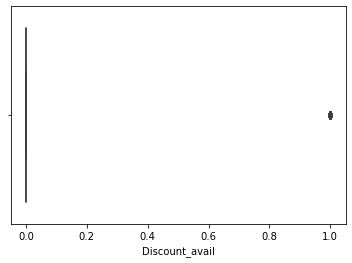

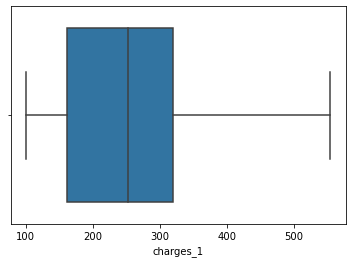

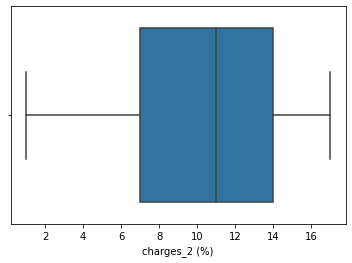

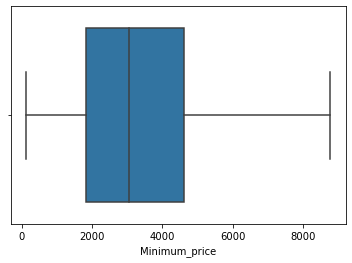

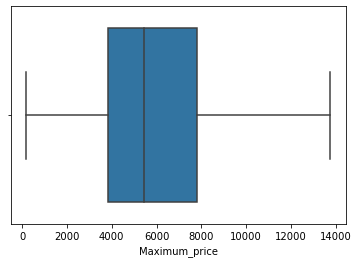

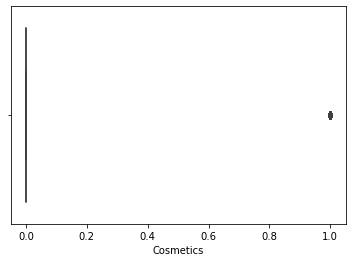

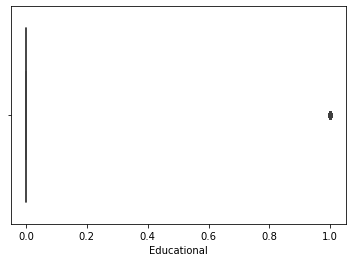

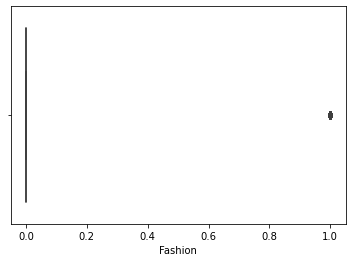

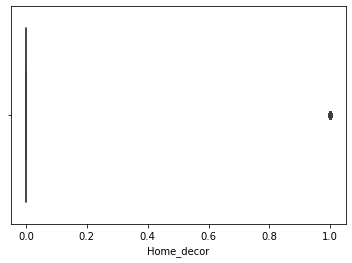

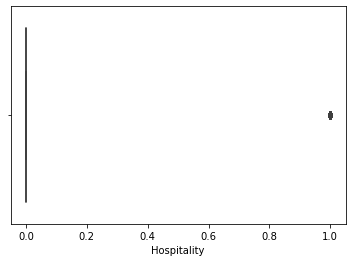

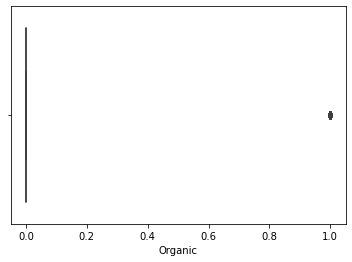

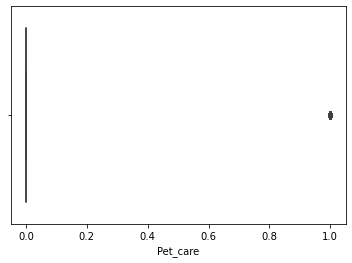

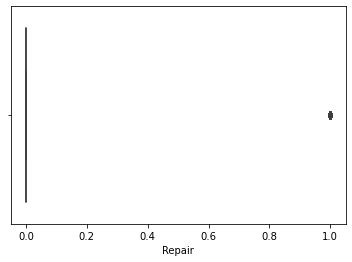

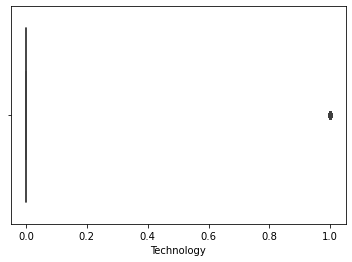

In [38]:
for col in dftest.columns[3:]:
    sns.boxplot(dftest[col])
    plt.show()

### Handling Missing Values

In [39]:
for i in df.columns:
    print(df[i].isnull().sum(),i)

0 Product_id
5 Stall_no
0 instock_date
0 Market_Category
0 Loyalty_customer
0 Grade
0 Demand
38 Discount_avail
198 charges_1
205 charges_2 (%)
38 Minimum_price
343 Maximum_price
41 Selling_Price
0 Cosmetics
0 Educational
0 Fashion
0 Home_decor
0 Hospitality
0 Organic
0 Pet_care
0 Repair
0 Technology


In [40]:
for i in dftest.columns:
    print(dftest[i].isnull().sum(),i)

0 Product_id
1 Stall_no
0 instock_date
0 Market_Category
0 Loyalty_customer
0 Grade
0 Demand
0 Discount_avail
36 charges_1
5 charges_2 (%)
14 Minimum_price
0 Maximum_price
0 Cosmetics
0 Educational
0 Fashion
0 Home_decor
0 Hospitality
0 Organic
0 Pet_care
0 Repair
0 Technology


In [41]:
#Stall_no

df.Stall_no = df.Stall_no.fillna(df.Stall_no.mean())
dftest.Stall_no = dftest.Stall_no.fillna(dftest.Stall_no.mean())


In [42]:
#Discount_avail
df.Discount_avail.fillna(df.Discount_avail.mean(),inplace = True)


In [43]:
#charges_1

impute_nan(df,'charges_1')
df.drop('charges_1',axis=1,inplace=True)
df.rename(columns = {'charges_1_random':'charges_1'},inplace=True)

impute_nan(dftest,'charges_1')
dftest.drop('charges_1',axis=1,inplace=True)
dftest.rename(columns = {'charges_1_random':'charges_1'},inplace=True)

In [44]:
print(dftest.charges_1.isnull().sum(),
df.charges_1.isnull().sum())

0 0


In [45]:
print(df['charges_2 (%)'].median(),'    ',
df['charges_2 (%)'].mean())

10.0      10.146195034885608


In [46]:
#charges_2 (%)

df['charges_2 (%)'].fillna(df['charges_2 (%)'].median(),inplace=True)
dftest['charges_2 (%)'].fillna(dftest['charges_2 (%)'].median(),inplace=True)

In [47]:
print(df['charges_2 (%)'].isnull().sum(),
dftest['charges_2 (%)'].isnull().sum())

0 0


In [48]:
# Filling Nan Values  in df.Minimum_price

impute_nan(df,'Minimum_price')
df.drop('Minimum_price',axis=1,inplace=True)
df.rename(columns = {'Minimum_price_random':'Minimum_price'},inplace=True)

impute_nan(dftest,'Minimum_price')
dftest.drop('Minimum_price',axis=1,inplace=True)
dftest.rename(columns = {'Minimum_price_random':'Minimum_price'},inplace=True)

In [49]:
print(df['Minimum_price'].isnull().sum(),
dftest['Minimum_price'].isnull().sum())

0 0


In [50]:
# Filling Nan Values  in df.Maximum_price

impute_nan(df,'Maximum_price')
df.drop('Maximum_price',axis=1,inplace=True)
df.rename(columns = {'Maximum_price_random':'Maximum_price'},inplace=True)

In [51]:
df['Maximum_price'].isnull().sum()

0

In [52]:
# Filling Nan Values  in df.Selling_Price

impute_nan(df,'Selling_Price')
df.drop('Selling_Price',axis=1,inplace=True)
df.rename(columns = {'Selling_Price_random':'Selling_Price'},inplace=True)

In [53]:
df['Selling_Price'].isnull().sum()

0

In [54]:
df['instock_date'] = pd.to_datetime(df.instock_date)
dftest['instock_date'] = pd.to_datetime(dftest.instock_date)

In [55]:
df.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Loyalty_customer', 'Grade', 'Demand', 'Discount_avail',
       'charges_2 (%)', 'Cosmetics', 'Educational', 'Fashion', 'Home_decor',
       'Hospitality', 'Organic', 'Pet_care', 'Repair', 'Technology',
       'charges_1', 'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [56]:
# df.instock_date= pd.to_datetime(df.instock_date)
day = []
for i in range(df.shape[0]):
    day.append(df.iloc[i,2].day_name())
    

In [57]:
dftest.instock_date= pd.to_datetime(dftest.instock_date)
daytest = []
for i in range(dftest.shape[0]):
    daytest.append(dftest.iloc[i,2].day_name())
    

In [58]:

# day = pd.get_dummies(df.Day,drop_first=True)
# daytest = pd.get_dummies(dftest.Day,drop_first=True)

In [59]:
# Import label encoder 

df['Day'] = day
dftest['Day'] = daytest
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df['Day']= label_encoder.fit_transform(df['Day']) 

df['Day'].unique() 


array([2, 3, 5, 1, 0, 6, 4])

In [60]:
dftest['Day']= label_encoder.fit_transform(dftest['Day']) 

dftest['Day'].unique()

array([6, 3, 2, 0, 4, 1, 5])

(array([ 894.,  615.,  965., 1169.,  931.,  628.,  420.,  320.,  195.,
         231.]),
 array([4.00000000e+00, 1.17624002e+03, 2.34848003e+03, 3.52072005e+03,
        4.69296006e+03, 5.86520008e+03, 7.03744010e+03, 8.20968011e+03,
        9.38192013e+03, 1.05541601e+04, 1.17264002e+04]),
 <a list of 10 Patch objects>)

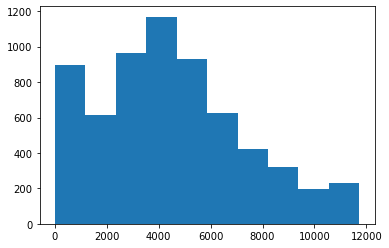

In [61]:
plt.hist(df.Selling_Price)

In [62]:
df.instock_date.max() - df.instock_date.min()

Timedelta('768 days 14:56:05')

In [63]:
df['month'] = pd.DatetimeIndex(df['instock_date']).month
dftest['month'] = pd.DatetimeIndex(dftest['instock_date']).month


In [64]:
df['year'] = pd.DatetimeIndex(df['instock_date']).year
dftest['year'] = pd.DatetimeIndex(dftest['instock_date']).year


In [65]:
df.drop('instock_date',axis=1,inplace=True)

dftest.drop('instock_date',axis=1,inplace=True)

In [66]:
dftest.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_2 (%),Maximum_price,Cosmetics,...,Hospitality,Organic,Pet_care,Repair,Technology,charges_1,Minimum_price,Day,month,year
0,SCHE4YSTDVPVZVXW,39.0,205,0,0,90,0,16.0,3340.00,0,...,0,0,0,0,0,380.0,2576.0,6,1,2016
1,ACCEGCATKHNRXUHW,49.0,3,1,0,87,0,16.0,1955.00,0,...,0,0,0,0,0,393.0,1202.0,3,8,2015
2,NKCE6GJ5XVJDXNNZ,1.0,183,0,2,55,0,9.0,13762.75,0,...,0,0,0,0,1,493.0,7175.0,2,11,2015
3,NKCEB8BK3ZXDHDHM,8.0,358,1,3,86,0,16.0,13078.00,0,...,0,0,0,0,0,303.0,5404.0,2,11,2015
4,TOPEFDXSAHRNPF94,33.0,167,0,0,27,0,16.0,6244.00,0,...,0,0,0,0,1,554.5,4069.0,6,5,2015


In [67]:
df.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Grade', 'Demand', 'Discount_avail', 'charges_2 (%)', 'Cosmetics',
       'Educational', 'Fashion', 'Home_decor', 'Hospitality', 'Organic',
       'Pet_care', 'Repair', 'Technology', 'charges_1', 'Minimum_price',
       'Maximum_price', 'Selling_Price', 'Day', 'month', 'year'],
      dtype='object')

In [68]:
dftest.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Grade', 'Demand', 'Discount_avail', 'charges_2 (%)', 'Maximum_price',
       'Cosmetics', 'Educational', 'Fashion', 'Home_decor', 'Hospitality',
       'Organic', 'Pet_care', 'Repair', 'Technology', 'charges_1',
       'Minimum_price', 'Day', 'month', 'year'],
      dtype='object')

In [69]:
df.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Grade', 'Demand', 'Discount_avail', 'charges_2 (%)', 'Cosmetics',
       'Educational', 'Fashion', 'Home_decor', 'Hospitality', 'Organic',
       'Pet_care', 'Repair', 'Technology', 'charges_1', 'Minimum_price',
       'Maximum_price', 'Selling_Price', 'Day', 'month', 'year'],
      dtype='object')

In [70]:
X = df.drop(['Selling_Price','Product_id'],axis=1)

In [71]:
x = df.drop(['Selling_Price'],axis=1)

In [72]:
y = df['Selling_Price']

In [73]:
df.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_2 (%),Cosmetics,Educational,...,Pet_care,Repair,Technology,charges_1,Minimum_price,Maximum_price,Selling_Price,Day,month,year
0,BRAE2NF6JA5GUEXG,37.0,2,1,1,68,0.0,11.0,0,0,...,0,0,0,376.0,2983.0,4713.0,4185.947700,2,8,2015
1,TUNE8SFB6RJN2HSD,38.0,24,1,0,51,0.0,12.0,0,0,...,0,0,0,397.0,7495.0,10352.0,9271.490256,3,3,2016
2,BRAEAR7WZPQGPBZU,9.0,447,1,0,10,0.0,9.0,0,0,...,0,0,0,250.0,5752.0,7309.0,6785.701362,5,8,2015
3,WATDZ2ZQ8JPDHCTJ,50.0,23,1,2,48,0.0,13.0,0,1,...,0,0,0,144.0,5090.0,14438.0,11726.400162,1,3,2016
4,JWSEBUKYQPMBZ3RK,7.0,63,1,1,35,1.0,4.0,0,0,...,0,1,0,211.0,2430.0,9261.0,906.553935,5,3,2016


In [74]:
dftest = dftest.reindex(columns=x.columns)


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [76]:
dftest.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Loyalty_customer',
       'Grade', 'Demand', 'Discount_avail', 'charges_2 (%)', 'Cosmetics',
       'Educational', 'Fashion', 'Home_decor', 'Hospitality', 'Organic',
       'Pet_care', 'Repair', 'Technology', 'charges_1', 'Minimum_price',
       'Maximum_price', 'Day', 'month', 'year'],
      dtype='object')

In [77]:
df.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_2 (%),Cosmetics,Educational,...,Pet_care,Repair,Technology,charges_1,Minimum_price,Maximum_price,Selling_Price,Day,month,year
0,BRAE2NF6JA5GUEXG,37.0,2,1,1,68,0.0,11.0,0,0,...,0,0,0,376.0,2983.0,4713.0,4185.947700,2,8,2015
1,TUNE8SFB6RJN2HSD,38.0,24,1,0,51,0.0,12.0,0,0,...,0,0,0,397.0,7495.0,10352.0,9271.490256,3,3,2016
2,BRAEAR7WZPQGPBZU,9.0,447,1,0,10,0.0,9.0,0,0,...,0,0,0,250.0,5752.0,7309.0,6785.701362,5,8,2015
3,WATDZ2ZQ8JPDHCTJ,50.0,23,1,2,48,0.0,13.0,0,1,...,0,0,0,144.0,5090.0,14438.0,11726.400162,1,3,2016
4,JWSEBUKYQPMBZ3RK,7.0,63,1,1,35,1.0,4.0,0,0,...,0,1,0,211.0,2430.0,9261.0,906.553935,5,3,2016


### Modeling

In [78]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_log_error


from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor


# from sklearn.feature_selection import SelectFwe, f_regression

# from sklearn.pipeline import make_pipeline


In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV



from sklearn.model_selection import cross_val_score


In [108]:
GBR=GradientBoostingRegressor()


search_grid={'n_estimators':[100,200,300],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}

search=RandomizedSearchCV(GradientBoostingRegressor(),search_grid,n_jobs=1,cv=5,n_iter=10)

In [109]:
search.fit(X,y)


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4],
                                        'n_estimators': [100, 200, 300],
                                        'random_state': [1],
                                        'subsample': [0.5, 0.75, 1]})

In [110]:
search.best_params_

{'subsample': 0.5,
 'random_state': 1,
 'n_estimators': 100,
 'max_depth': 4,
 'learning_rate': 0.1}

In [92]:
(cross_val_score(XGBRegressor(max_depth =  6, min_child_weight =  7),X,y)
)# 

array([0.96146358, 0.96256807, 0.95203725, 0.93827509, 0.95938293])

In [111]:
model = GradientBoostingRegressor(subsample =  0.5,
 random_state =  1,
 n_estimators =  100,
 max_depth= 4,
 learning_rate= 0.1)


model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9516678789441562

In [112]:
pred = abs(model.predict(X_test))

In [113]:
# {'subsample': 0.5,
#  'random_state': 1,
#  'n_estimators': 100,
#  'max_depth': 4,
#  'learning_rate': 0.1

In [114]:
score = max(0,100-np.sqrt(mean_squared_log_error(Y_test,pred)))

In [115]:
score

99.76251013122912

In [116]:
results = abs(model.predict(dftest.drop(['Product_id'],axis=1)))

In [117]:
sub = pd.DataFrame({'Product_id':dftest.Product_id, 'Selling_Price':results})

In [118]:
sub.to_csv('sub.csv')

In [119]:
df.head()

,Product_id,Stall_no,Market_Category,Loyalty_customer,Grade,Demand,Discount_avail,charges_2 (%),Cosmetics,Educational,...,Pet_care,Repair,Technology,charges_1,Minimum_price,Maximum_price,Selling_Price,Day,month,year
0,BRAE2NF6JA5GUEXG,37.0,2,1,1,68,0.0,11.0,0,0,...,0,0,0,376.0,2983.0,4713.0,4185.947700,2,8,2015
1,TUNE8SFB6RJN2HSD,38.0,24,1,0,51,0.0,12.0,0,0,...,0,0,0,397.0,7495.0,10352.0,9271.490256,3,3,2016
2,BRAEAR7WZPQGPBZU,9.0,447,1,0,10,0.0,9.0,0,0,...,0,0,0,250.0,5752.0,7309.0,6785.701362,5,8,2015
3,WATDZ2ZQ8JPDHCTJ,50.0,23,1,2,48,0.0,13.0,0,1,...,0,0,0,144.0,5090.0,14438.0,11726.400162,1,3,2016
4,JWSEBUKYQPMBZ3RK,7.0,63,1,1,35,1.0,4.0,0,0,...,0,1,0,211.0,2430.0,9261.0,906.553935,5,3,2016
